In [1]:
import numpy as np
import itertools
import math
import scipy
from scipy import spatial
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.patches as patches
from matplotlib import animation
from matplotlib import transforms
from mpl_toolkits.axes_grid1 import make_axes_locatable
import xarray as xr
import dask
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
import netCDF4
import matplotlib.image as imag
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA,IncrementalPCA
from yellowbrick.cluster import KElbowVisualizer
from matplotlib import ticker
import cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs
from mpl_toolkits.basemap import Basemap
from statistics import mode
from scipy.ndimage.filters import uniform_filter1d
from sklearn.utils import shuffle
from scipy.stats import norm
from mpl_toolkits.mplot3d import Axes3D

import matplotlib.cm as cm
import warnings
warnings.filterwarnings("ignore")
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

/export/home/gmooers/miniconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
def plot_generator_paper(sample, X, Z):
    
    fz = 15*1.25
    lw = 4
    siz = 100
    XNNA = 1.25 # Abscissa where architecture-constrained network will be placed
    XTEXT = 0.25 # Text placement
    YTEXT = 0.3 # Text placement
    
    plt.rc('text', usetex=False)
    matplotlib.rcParams['mathtext.fontset'] = 'stix'
    matplotlib.rcParams['font.family'] = 'STIXGeneral'
    #mpl.rcParams["font.serif"] = "STIX"
    plt.rc('font', family='serif', size=fz)
    matplotlib.rcParams['lines.linewidth'] = lw
    
    
    cmap="RdBu_r"
    fig, ax = plt.subplots(1,1, figsize=(15,6))
    cs0 = ax.pcolor(X, Z, sample, cmap=cmap, vmin=-1.0, vmax = 1.0)
    ax.set_title("Anomalous Vertical Velocity Field Detected By ELBO")
    ax.set_ylim(ax.get_ylim()[::-1])
    ax.set_xlabel("CRMs", fontsize=fz*1.5)
    ax.xaxis.set_label_coords(0.54,-0.05)
    h = ax.set_ylabel("hPa", fontsize = fz*1.5)
    h.set_rotation(0)
    ax.yaxis.set_label_coords(-0.10,0.44)
    #y_ticks = np.arange(1350, 0, -350)
    #ax.set_yticklabels(y_ticks, fontsize=fz*1.33)
    ax.tick_params(axis='x', labelsize=fz*1.33)
    ax.tick_params(axis='y', labelsize=fz*1.33)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = fig.colorbar(cs0, cax=cax)
    cbar.set_label(label=r'$\left(\mathrm{m\ s^{-1}}\right)$', rotation="horizontal", fontsize=fz*1.5, labelpad=30, y = 0.65)
    plt.show()
    #plt.savefig("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/CI_Figure_Data/Anomaly.pdf")
    
#plot_generator(test[0,:,:])

In [3]:
fz = 15*1.5
lw = 4
siz = 100
XNNA = 1.25 # Abscissa where architecture-constrained network will be placed
XTEXT = 0.25 # Text placement
YTEXT = 0.3 # Text placement

plt.rc('text', usetex=False)
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
#mpl.rcParams["font.serif"] = "STIX"
plt.rc('font', family='serif', size=fz)
matplotlib.rcParams['lines.linewidth'] = lw

In [4]:
others = netCDF4.Dataset("/fast/gmooers/Raw_Data/extras/TimestepOutput_Neuralnet_SPCAM_216.cam.h1.2009-01-01-00000.nc")
levs = np.array(others.variables['lev'])
new = np.flip(levs)
crms = np.arange(1,129,1)
Xs, Zs = np.meshgrid(crms, new)

In [5]:
Synoptic_Amazon_W_Test_2D = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Latant_Space_Constrained_VAEs/model_graphs/latant_space/Synoptic_Amazon_Point_2D_PCA_Latent_Space__369.npy")
Synoptic_SC_Cloud_W_Test_2D = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Latant_Space_Constrained_VAEs/model_graphs/latant_space/Synoptic_SC_Point_2D_PCA_Latent_Space__369.npy")
Synoptic_Desert_W_Test_2D = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Latant_Space_Constrained_VAEs/model_graphs/latant_space/Synoptic_Desert_Point_2D_PCA_Latent_Space__369.npy")
Synoptic_Warm_Pool_W_Test_2D = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Latant_Space_Constrained_VAEs/model_graphs/latant_space/Synoptic_Warm_Pool_Point_2D_PCA_Latent_Space__369.npy")

z_test_tsne = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Latant_Space_Constrained_VAEs/model_graphs/latant_space/2D_PCA_Latent_Space__369.npy")


Amazon_Test_Images = np.load("/fast/gmooers/Preprocessed_Data/Single_Amazon_Unaveraged/w_var_synoptic_amazon_point.npy")
SC_Cloud_Test_Images = np.load("/fast/gmooers/Preprocessed_Data/Single_Amazon_Unaveraged/w_var_synoptic_sc_point.npy")
Desert_Test_Images = np.load("/fast/gmooers/Preprocessed_Data/Single_Amazon_Unaveraged/w_var_synoptic_desert_point.npy")
Warm_Pool_Test_Images = np.load("/fast/gmooers/Preprocessed_Data/Single_Amazon_Unaveraged/w_var_synoptic_warm_pool_point.npy")

Max_Scalar = np.load("/fast/gmooers/Preprocessed_Data/W_Variable/Space_Time_Max_Scalar.npy")
Min_Scalar = np.load("/fast/gmooers/Preprocessed_Data/W_Variable/Space_Time_Min_Scalar.npy")

Amazon_Test_Images = np.interp(Amazon_Test_Images, (0, 1), (Min_Scalar, Max_Scalar))
SC_Cloud_Test_Images = np.interp(SC_Cloud_Test_Images, (0, 1), (Min_Scalar, Max_Scalar))
Desert_Test_Images = np.interp(Desert_Test_Images, (0, 1), (Min_Scalar, Max_Scalar))
Warm_Pool_Test_Images = np.interp(Warm_Pool_Test_Images, (0, 1), (Min_Scalar, Max_Scalar))

In [6]:
amazon_labels = np.empty(shape=(len(Synoptic_Amazon_W_Test_2D)))
sc_cloud_labels = np.empty(shape=(len(Synoptic_SC_Cloud_W_Test_2D)))
desert_labels = np.empty(shape=(len(Synoptic_Desert_W_Test_2D)))
warm_pool_labels = np.empty(shape=(len(Synoptic_Warm_Pool_W_Test_2D)))

count = 0
for i in range(24):
    for j in range(4):
        amazon_labels[count::96] = i
        sc_cloud_labels[count::96] = i
        desert_labels[count::96] = i
        warm_pool_labels[count::96] = i
        count = count+1

In [7]:
print(Synoptic_Amazon_W_Test_2D.shape)

(960, 2)


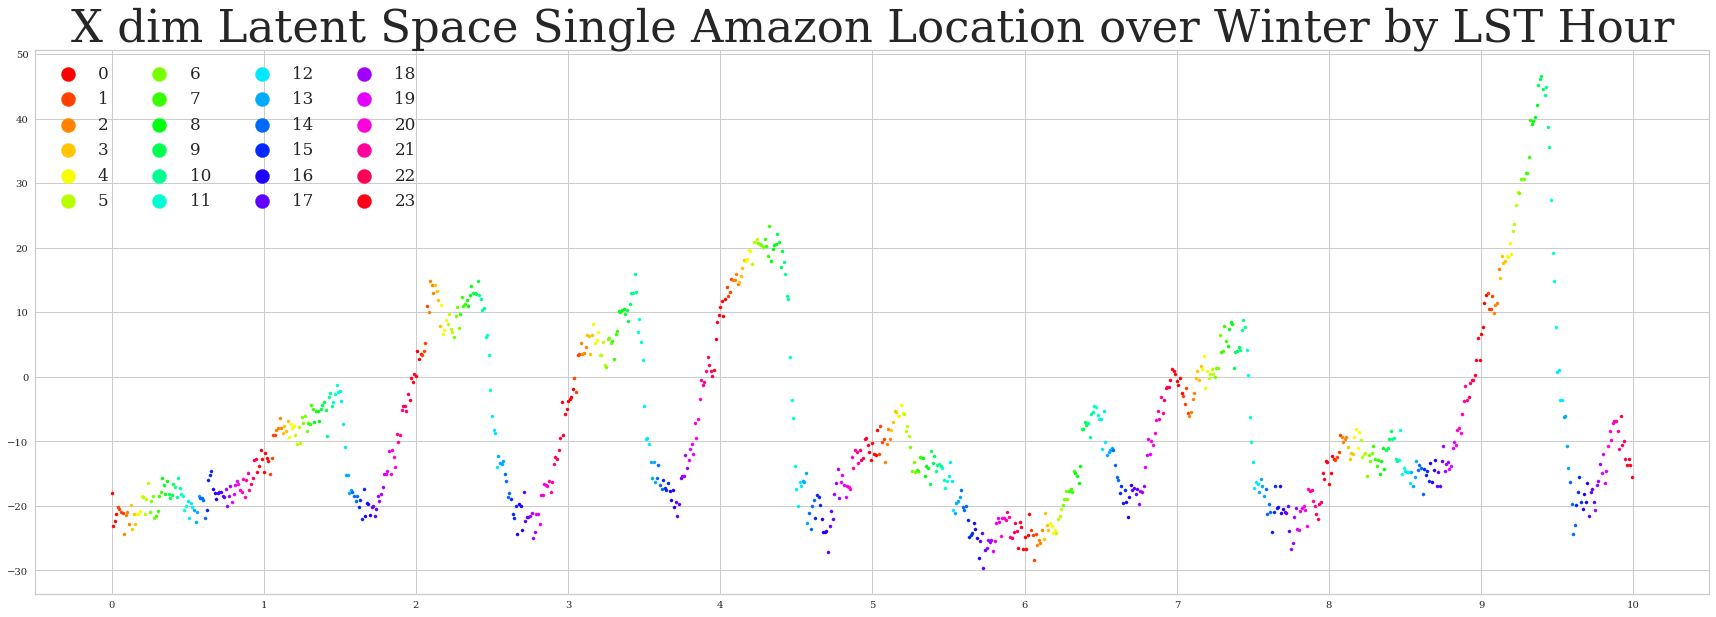

In [10]:
colors = cm.hsv(np.linspace(0, 1, 24))
fig, ax = plt.subplots(figsize=(30, 10))

obs = []
for i in range(len(Synoptic_Amazon_W_Test_2D)):
    if int(amazon_labels[i]) not in obs:
        obs.append(int(amazon_labels[i]))
        ax.scatter(x=i, y=Synoptic_Amazon_W_Test_2D[i, 0], c=colors[int(amazon_labels[i])], s=10.0, label = str(int(amazon_labels[i])))
    else:
        ax.scatter(x=i, y=Synoptic_Amazon_W_Test_2D[i, 0], c=colors[int(amazon_labels[i])], s=10.0)
        

lgnd = ax.legend(loc="best", ncol=4, fontsize=fz*0.75)
for handle in lgnd.legendHandles:
    handle.set_sizes([200.0])
    
x_ticks = np.arange(0,1054,96)
ax.set_xticks(x_ticks)
x_tick_labels = np.arange(0,11,1)
ax.set_xticklabels(x_tick_labels)    


ax.set_title("X dim Latent Space Single Amazon Location over Winter by LST Hour", fontsize=fz*2)
print(" ")

In [11]:
def Timestep_time_gen(starter):
    if starter == 96:
        starter = 0
    
    time = str(int(starter/4))
    remainder = starter % 4
    if remainder == 0:
        decimal =":00 LST"
    if remainder == 1:
        decimal =":15 LST"
    if remainder == 2:
        decimal =":30 LST"
    if remainder == 3:
        decimal =":45 LST"
    new_time = time + decimal
    return new_time

In [25]:
# change vx/vy to location on sorted images
def rotated_latent_animation(h_coords, latent_space, xdist, ydist, X, Z, h_images):
    #fig, ax = plt.subplots(2,2, figsize=(36,16))
    colors = cm.hsv(np.linspace(0, 1, 24))
    bc_labels = ["0","1","2","3", "4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20","21","22","23"]

    feat_list = []
    #the real total you need
    num_steps = len(h_coords)
    #num_steps = 10
    cmap= "RdBu_r"
    
    dummy_horz = np.zeros(shape=(30,128))
    dummy_horz[:,:] = np.nan
    dummy_vert = np.zeros(shape=(30,128))
    dummy_vert[:,:] = np.nan
    count = 29
    daily_cycler = 0
    counter = -1
    color_tracker = 0
    
    for i in range(num_steps):
        fig, ax = plt.subplots(2,2, figsize=(36,16))
        for j in range(len(dummy_horz)):
            dummy_horz[count,:] = h_images[i,j,:]
            count = count-1

        h_rect = patches.Circle((h_coords[i,0],h_coords[i,1]),1.0,linewidth=4,edgecolor='black',facecolor='black')
        h_rect_x = patches.Circle((i,h_coords[i,0]),1.0,linewidth=4,edgecolor='black',facecolor='black')
        h_rect_y = patches.Circle((i,h_coords[i,1]),1.0,linewidth=4,edgecolor='black',facecolor='black')
        
        ax[0,0].scatter(latent_space[:, 0], latent_space[:, 1], c="Black", s=1.0, alpha=0.5)
        
        for a in range(len(h_coords)):
            if a%4 == 0:
                counter = counter+1
                color_tracker = color_tracker+1
                if color_tracker >23:
                    color_tracker = 0
                if counter <= 23:
                    cb_x = ax[1,0].scatter(x=a, y=h_coords[a, 0], c=colors[color_tracker], s=25, label=str(int(a/4)))
                    cb_y = ax[1,1].scatter(x=a, y=h_coords[a, 1], c=colors[color_tracker], s=25, label=str(int(a/4)))
                    cb = ax[0,0].scatter(x=h_coords[a, 0], y=h_coords[a, 1], c=colors[color_tracker], s=25, label=str(int(a/4)))
            else:
                cb_x = ax[1,0].scatter(x=a, y=h_coords[a, 0], c=colors[color_tracker], s=25)
                cb_y = ax[1,1].scatter(x=a, y=h_coords[a, 1], c=colors[color_tracker], s=25)
                cb = ax[0,0].scatter(x=h_coords[a, 0], y=h_coords[a, 1], c=colors[color_tracker], s=25)
        
        #if i ==0:
        ax[0,0].legend(loc="best", ncol=4, fontsize=fz*0.75)
        ax[0,0].set_title("2D Latent Space", fontsize=fz*1.5)
        ax[1,0].set_title("Latent Space X Dimension in time", fontsize=fz*1.5)
        ax[1,1].set_title("Latent Space Y Dimension in time", fontsize=fz*1.5)
        
        
        x_ticks = np.arange(0,1054,96)
        ax[1,0].set_xticks(x_ticks)
        ax[1,1].set_xticks(x_ticks)
        x_tick_labels = np.arange(0,11,1)
        ax[1,0].set_xticklabels(x_tick_labels)  
        ax[1,1].set_xticklabels(x_tick_labels) 
        

        current_time = Timestep_time_gen(daily_cycler)
        daily_cycler = daily_cycler + 1
        if daily_cycler >= 96:
            daily_cycler = 0
         
        
        title_current = ax[0,1].text(0.5,1.05,"Vertical Velocity Field at ".format(i)+current_time.format(i), size=plt.rcParams["axes.titlesize"],
                    ha="center", transform=ax[0,1].transAxes, fontsize=fz*1.5)
        
        cs3 = ax[0,0].add_patch(h_rect)
        cs0 = ax[1,0].add_patch(h_rect_x)
        cs1 = ax[1,1].add_patch(h_rect_y)
        

        cs2  = ax[0,1].pcolor(X, Z, dummy_horz, cmap=cmap, vmin = -1.0, vmax = 1.0)
        #ax[0,1].set_title("(x) Deep Convection", fontsize=fz*2.0)
        

        ax[0,1].set_xlabel("CRMs", fontsize=fz)
        ax[0,1].set_ylabel("Pressure (hpa)", fontsize=fz)
        
        y_ticks = np.array([1000, 800, 600, 400, 200])
        ax[0,1].set_yticklabels(y_ticks)
        
        divider = make_axes_locatable(ax[0,1])
        cax = divider.append_axes("right", size="5%", pad=0.05)
        fig.colorbar(cs2, cax=cax)
        
        #feat_list.append([cs1, cs0, title_current])
        
        count = 29 
        if i%10 == 0:
            print(i)
        
        counter = -1
        color_tracker = 0
        #ani = animation.ArtistAnimation(fig, feat_list, interval = 125, blit = False, repeat = True)
        #ani.save('/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Animations/Figures/Movies/Amazon_Synoptic_Cycle_Tracker.mp4')
        if i < 10:
            plt.savefig("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Latant_Space_Constrained_VAEs/Mooers_Logbook/Synoptic_Cycles/Videos/XY_Amazon/00"+str(i)+".png")
        if i >= 10 and i < 100:
            plt.savefig("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Latant_Space_Constrained_VAEs/Mooers_Logbook/Synoptic_Cycles/Videos/XY_Amazon/0"+str(i)+".png")
        if i >= 100:
            plt.savefig("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Latant_Space_Constrained_VAEs/Mooers_Logbook/Synoptic_Cycles/Videos/XY_Amazon/"+str(i)+".png")
        plt.close()
    
        
    
rotated_latent_animation(Synoptic_Amazon_W_Test_2D, z_test_tsne, 0.4, 1.5, Xs, Zs, Amazon_Test_Images)

0


In [ ]:
# change vx/vy to location on sorted images
def rotated_latent_animation(h_coords, latent_space, xdist, ydist, X, Z, h_images):
    #fig, ax = plt.subplots(2,2, figsize=(36,16))
    colors = cm.hsv(np.linspace(0, 1, 24))
    bc_labels = ["0","1","2","3", "4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20","21","22","23"]

    feat_list = []
    #the real total you need
    num_steps = len(h_coords)
    #num_steps = 10
    cmap= "RdBu_r"
    
    dummy_horz = np.zeros(shape=(30,128))
    dummy_horz[:,:] = np.nan
    dummy_vert = np.zeros(shape=(30,128))
    dummy_vert[:,:] = np.nan
    count = 29
    daily_cycler = 0
    counter = -1
    color_tracker = 0
    
    for i in range(num_steps):
        fig, ax = plt.subplots(2,2, figsize=(36,16))
        for j in range(len(dummy_horz)):
            dummy_horz[count,:] = h_images[i,j,:]
            count = count-1

        h_rect = patches.Circle((h_coords[i,0],h_coords[i,1]),1.0,linewidth=4,edgecolor='black',facecolor='black')
        h_rect_x = patches.Circle((i,h_coords[i,0]),1.0,linewidth=4,edgecolor='black',facecolor='black')
        h_rect_y = patches.Circle((i,h_coords[i,1]),1.0,linewidth=4,edgecolor='black',facecolor='black')
        
        ax[0,0].scatter(latent_space[:, 0], latent_space[:, 1], c="Black", s=1.0, alpha=0.5)
        
        for a in range(len(h_coords)):
            if a%4 == 0:
                counter = counter+1
                color_tracker = color_tracker+1
                if color_tracker >23:
                    color_tracker = 0
                if counter <= 23:
                    cb_x = ax[1,0].scatter(x=a, y=h_coords[a, 0], c=colors[color_tracker], s=25, label=str(int(a/4)))
                    cb_y = ax[1,1].scatter(x=a, y=h_coords[a, 1], c=colors[color_tracker], s=25, label=str(int(a/4)))
                    cb = ax[0,0].scatter(x=h_coords[a, 0], y=h_coords[a, 1], c=colors[color_tracker], s=25, label=str(int(a/4)))
            else:
                cb_x = ax[1,0].scatter(x=a, y=h_coords[a, 0], c=colors[color_tracker], s=25)
                cb_y = ax[1,1].scatter(x=a, y=h_coords[a, 1], c=colors[color_tracker], s=25)
                cb = ax[0,0].scatter(x=h_coords[a, 0], y=h_coords[a, 1], c=colors[color_tracker], s=25)
        
        #if i ==0:
        ax[0,0].legend(loc="best", ncol=4, fontsize=fz*0.75)
        ax[0,0].set_title("2D Latent Space", fontsize=fz*1.5)
        ax[1,0].set_title("Latent Space X Dimension in time", fontsize=fz*1.5)
        ax[1,1].set_title("Latent Space Y Dimension in time", fontsize=fz*1.5)
        
        
        x_ticks = np.arange(0,1054,96)
        ax[1,0].set_xticks(x_ticks)
        ax[1,1].set_xticks(x_ticks)
        x_tick_labels = np.arange(0,11,1)
        ax[1,0].set_xticklabels(x_tick_labels)  
        ax[1,1].set_xticklabels(x_tick_labels) 
        

        current_time = Timestep_time_gen(daily_cycler)
        daily_cycler = daily_cycler + 1
        if daily_cycler >= 96:
            daily_cycler = 0
         
        
        title_current = ax[0,1].text(0.5,1.05,"Vertical Velocity Field at ".format(i)+current_time.format(i), size=plt.rcParams["axes.titlesize"],
                    ha="center", transform=ax[0,1].transAxes, fontsize=fz*1.5)
        
        cs3 = ax[0,0].add_patch(h_rect)
        cs0 = ax[1,0].add_patch(h_rect_x)
        cs1 = ax[1,1].add_patch(h_rect_y)
        

        cs2  = ax[0,1].pcolor(X, Z, dummy_horz, cmap=cmap, vmin = -1.0, vmax = 1.0)
        #ax[0,1].set_title("(x) Deep Convection", fontsize=fz*2.0)
        

        ax[0,1].set_xlabel("CRMs", fontsize=fz)
        ax[0,1].set_ylabel("Pressure (hpa)", fontsize=fz)
        
        y_ticks = np.array([1000, 800, 600, 400, 200])
        ax[0,1].set_yticklabels(y_ticks)
        
        divider = make_axes_locatable(ax[0,1])
        cax = divider.append_axes("right", size="5%", pad=0.05)
        fig.colorbar(cs2, cax=cax)
        
        #feat_list.append([cs1, cs0, title_current])
        
        count = 29 
        if i%10 == 0:
            print(i)
        
        counter = -1
        color_tracker = 0
        #ani = animation.ArtistAnimation(fig, feat_list, interval = 125, blit = False, repeat = True)
        #ani.save('/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Animations/Figures/Movies/Amazon_Synoptic_Cycle_Tracker.mp4')
        if i < 10:
            plt.savefig("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Latant_Space_Constrained_VAEs/Mooers_Logbook/Synoptic_Cycles/Videos/XY_SC_Cloud/00"+str(i)+".png")
        if i >= 10 and i < 100:
            plt.savefig("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Latant_Space_Constrained_VAEs/Mooers_Logbook/Synoptic_Cycles/Videos/XY_SC_Cloud/0"+str(i)+".png")
        if i >= 100:
            plt.savefig("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Latant_Space_Constrained_VAEs/Mooers_Logbook/Synoptic_Cycles/Videos/XY_SC_Cloud/"+str(i)+".png")
        plt.close()
    
        
    
rotated_latent_animation(Synoptic_SC_Cloud_W_Test_2D, z_test_tsne, 0.4, 1.5, Xs, Zs, SC_Cloud_Test_Images)

In [ ]:
# change vx/vy to location on sorted images
def rotated_latent_animation(h_coords, latent_space, xdist, ydist, X, Z, h_images):
    #fig, ax = plt.subplots(2,2, figsize=(36,16))
    colors = cm.hsv(np.linspace(0, 1, 24))
    bc_labels = ["0","1","2","3", "4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20","21","22","23"]

    feat_list = []
    #the real total you need
    num_steps = len(h_coords)
    #num_steps = 10
    cmap= "RdBu_r"
    
    dummy_horz = np.zeros(shape=(30,128))
    dummy_horz[:,:] = np.nan
    dummy_vert = np.zeros(shape=(30,128))
    dummy_vert[:,:] = np.nan
    count = 29
    daily_cycler = 0
    counter = -1
    color_tracker = 0
    
    for i in range(num_steps):
        fig, ax = plt.subplots(2,2, figsize=(36,16))
        for j in range(len(dummy_horz)):
            dummy_horz[count,:] = h_images[i,j,:]
            count = count-1

        h_rect = patches.Circle((h_coords[i,0],h_coords[i,1]),1.0,linewidth=4,edgecolor='black',facecolor='black')
        h_rect_x = patches.Circle((i,h_coords[i,0]),1.0,linewidth=4,edgecolor='black',facecolor='black')
        h_rect_y = patches.Circle((i,h_coords[i,1]),1.0,linewidth=4,edgecolor='black',facecolor='black')
        
        ax[0,0].scatter(latent_space[:, 0], latent_space[:, 1], c="Black", s=1.0, alpha=0.5)
        
        for a in range(len(h_coords)):
            if a%4 == 0:
                counter = counter+1
                color_tracker = color_tracker+1
                if color_tracker >23:
                    color_tracker = 0
                if counter <= 23:
                    cb_x = ax[1,0].scatter(x=a, y=h_coords[a, 0], c=colors[color_tracker], s=25, label=str(int(a/4)))
                    cb_y = ax[1,1].scatter(x=a, y=h_coords[a, 1], c=colors[color_tracker], s=25, label=str(int(a/4)))
                    cb = ax[0,0].scatter(x=h_coords[a, 0], y=h_coords[a, 1], c=colors[color_tracker], s=25, label=str(int(a/4)))
            else:
                cb_x = ax[1,0].scatter(x=a, y=h_coords[a, 0], c=colors[color_tracker], s=25)
                cb_y = ax[1,1].scatter(x=a, y=h_coords[a, 1], c=colors[color_tracker], s=25)
                cb = ax[0,0].scatter(x=h_coords[a, 0], y=h_coords[a, 1], c=colors[color_tracker], s=25)
        
        #if i ==0:
        ax[0,0].legend(loc="best", ncol=4, fontsize=fz*0.75)
        ax[0,0].set_title("2D Latent Space", fontsize=fz*1.5)
        ax[1,0].set_title("Latent Space X Dimension in time", fontsize=fz*1.5)
        ax[1,1].set_title("Latent Space Y Dimension in time", fontsize=fz*1.5)
        
        
        x_ticks = np.arange(0,1054,96)
        ax[1,0].set_xticks(x_ticks)
        ax[1,1].set_xticks(x_ticks)
        x_tick_labels = np.arange(0,11,1)
        ax[1,0].set_xticklabels(x_tick_labels)  
        ax[1,1].set_xticklabels(x_tick_labels) 
        

        current_time = Timestep_time_gen(daily_cycler)
        daily_cycler = daily_cycler + 1
        if daily_cycler >= 96:
            daily_cycler = 0
         
        
        title_current = ax[0,1].text(0.5,1.05,"Vertical Velocity Field at ".format(i)+current_time.format(i), size=plt.rcParams["axes.titlesize"],
                    ha="center", transform=ax[0,1].transAxes, fontsize=fz*1.5)
        
        cs3 = ax[0,0].add_patch(h_rect)
        cs0 = ax[1,0].add_patch(h_rect_x)
        cs1 = ax[1,1].add_patch(h_rect_y)
        

        cs2  = ax[0,1].pcolor(X, Z, dummy_horz, cmap=cmap, vmin = -1.0, vmax = 1.0)
        #ax[0,1].set_title("(x) Deep Convection", fontsize=fz*2.0)
        

        ax[0,1].set_xlabel("CRMs", fontsize=fz)
        ax[0,1].set_ylabel("Pressure (hpa)", fontsize=fz)
        
        y_ticks = np.array([1000, 800, 600, 400, 200])
        ax[0,1].set_yticklabels(y_ticks)
        
        divider = make_axes_locatable(ax[0,1])
        cax = divider.append_axes("right", size="5%", pad=0.05)
        fig.colorbar(cs2, cax=cax)
        
        #feat_list.append([cs1, cs0, title_current])
        
        count = 29 
        if i%10 == 0:
            print(i)
        
        counter = -1
        color_tracker = 0
        #ani = animation.ArtistAnimation(fig, feat_list, interval = 125, blit = False, repeat = True)
        #ani.save('/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Animations/Figures/Movies/Amazon_Synoptic_Cycle_Tracker.mp4')
        if i < 10:
            plt.savefig("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Latant_Space_Constrained_VAEs/Mooers_Logbook/Synoptic_Cycles/Videos/XY_Desert/00"+str(i)+".png")
        if i >= 10 and i < 100:
            plt.savefig("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Latant_Space_Constrained_VAEs/Mooers_Logbook/Synoptic_Cycles/Videos/XY_Desert/0"+str(i)+".png")
        if i >= 100:
            plt.savefig("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Latant_Space_Constrained_VAEs/Mooers_Logbook/Synoptic_Cycles/Videos/XY_Desert/"+str(i)+".png")
        plt.close()
    
        
    
rotated_latent_animation(Synoptic_Desert_W_Test_2D, z_test_tsne, 0.4, 1.5, Xs, Zs, Desert_Test_Images)

In [ ]:
# change vx/vy to location on sorted images
def rotated_latent_animation(h_coords, latent_space, xdist, ydist, X, Z, h_images):
    #fig, ax = plt.subplots(2,2, figsize=(36,16))
    colors = cm.hsv(np.linspace(0, 1, 24))
    bc_labels = ["0","1","2","3", "4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20","21","22","23"]

    feat_list = []
    #the real total you need
    num_steps = len(h_coords)
    #num_steps = 10
    cmap= "RdBu_r"
    
    dummy_horz = np.zeros(shape=(30,128))
    dummy_horz[:,:] = np.nan
    dummy_vert = np.zeros(shape=(30,128))
    dummy_vert[:,:] = np.nan
    count = 29
    daily_cycler = 0
    counter = -1
    color_tracker = 0
    
    for i in range(num_steps):
        fig, ax = plt.subplots(2,2, figsize=(36,16))
        for j in range(len(dummy_horz)):
            dummy_horz[count,:] = h_images[i,j,:]
            count = count-1

        h_rect = patches.Circle((h_coords[i,0],h_coords[i,1]),1.0,linewidth=4,edgecolor='black',facecolor='black')
        h_rect_x = patches.Circle((i,h_coords[i,0]),1.0,linewidth=4,edgecolor='black',facecolor='black')
        h_rect_y = patches.Circle((i,h_coords[i,1]),1.0,linewidth=4,edgecolor='black',facecolor='black')
        
        ax[0,0].scatter(latent_space[:, 0], latent_space[:, 1], c="Black", s=1.0, alpha=0.5)
        
        for a in range(len(h_coords)):
            if a%4 == 0:
                counter = counter+1
                color_tracker = color_tracker+1
                if color_tracker >23:
                    color_tracker = 0
                if counter <= 23:
                    cb_x = ax[1,0].scatter(x=a, y=h_coords[a, 0], c=colors[color_tracker], s=25, label=str(int(a/4)))
                    cb_y = ax[1,1].scatter(x=a, y=h_coords[a, 1], c=colors[color_tracker], s=25, label=str(int(a/4)))
                    cb = ax[0,0].scatter(x=h_coords[a, 0], y=h_coords[a, 1], c=colors[color_tracker], s=25, label=str(int(a/4)))
            else:
                cb_x = ax[1,0].scatter(x=a, y=h_coords[a, 0], c=colors[color_tracker], s=25)
                cb_y = ax[1,1].scatter(x=a, y=h_coords[a, 1], c=colors[color_tracker], s=25)
                cb = ax[0,0].scatter(x=h_coords[a, 0], y=h_coords[a, 1], c=colors[color_tracker], s=25)
        
        #if i ==0:
        ax[0,0].legend(loc="best", ncol=4, fontsize=fz*0.75)
        ax[0,0].set_title("2D Latent Space", fontsize=fz*1.5)
        ax[1,0].set_title("Latent Space X Dimension in time", fontsize=fz*1.5)
        ax[1,1].set_title("Latent Space Y Dimension in time", fontsize=fz*1.5)
        
        
        x_ticks = np.arange(0,1054,96)
        ax[1,0].set_xticks(x_ticks)
        ax[1,1].set_xticks(x_ticks)
        x_tick_labels = np.arange(0,11,1)
        ax[1,0].set_xticklabels(x_tick_labels)  
        ax[1,1].set_xticklabels(x_tick_labels) 
        

        current_time = Timestep_time_gen(daily_cycler)
        daily_cycler = daily_cycler + 1
        if daily_cycler >= 96:
            daily_cycler = 0
         
        
        title_current = ax[0,1].text(0.5,1.05,"Vertical Velocity Field at ".format(i)+current_time.format(i), size=plt.rcParams["axes.titlesize"],
                    ha="center", transform=ax[0,1].transAxes, fontsize=fz*1.5)
        
        cs3 = ax[0,0].add_patch(h_rect)
        cs0 = ax[1,0].add_patch(h_rect_x)
        cs1 = ax[1,1].add_patch(h_rect_y)
        

        cs2  = ax[0,1].pcolor(X, Z, dummy_horz, cmap=cmap, vmin = -1.0, vmax = 1.0)
        #ax[0,1].set_title("(x) Deep Convection", fontsize=fz*2.0)
        

        ax[0,1].set_xlabel("CRMs", fontsize=fz)
        ax[0,1].set_ylabel("Pressure (hpa)", fontsize=fz)
        
        y_ticks = np.array([1000, 800, 600, 400, 200])
        ax[0,1].set_yticklabels(y_ticks)
        
        divider = make_axes_locatable(ax[0,1])
        cax = divider.append_axes("right", size="5%", pad=0.05)
        fig.colorbar(cs2, cax=cax)
        
        #feat_list.append([cs1, cs0, title_current])
        
        count = 29 
        if i%10 == 0:
            print(i)
        
        counter = -1
        color_tracker = 0
        #ani = animation.ArtistAnimation(fig, feat_list, interval = 125, blit = False, repeat = True)
        #ani.save('/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Animations/Figures/Movies/Amazon_Synoptic_Cycle_Tracker.mp4')
        if i < 10:
            plt.savefig("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Latant_Space_Constrained_VAEs/Mooers_Logbook/Synoptic_Cycles/Videos/XY_Warm_Pool/00"+str(i)+".png")
        if i >= 10 and i < 100:
            plt.savefig("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Latant_Space_Constrained_VAEs/Mooers_Logbook/Synoptic_Cycles/Videos/XY_Warm_Pool/0"+str(i)+".png")
        if i >= 100:
            plt.savefig("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Latant_Space_Constrained_VAEs/Mooers_Logbook/Synoptic_Cycles/Videos/XY_Warm_Pool/"+str(i)+".png")
        plt.close()
    
        
    
rotated_latent_animation(Synoptic_Warm_Pool_W_Test_2D, z_test_tsne, 0.4, 1.5, Xs, Zs, Warm_Pool_Test_Images)